In [23]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data_file="/home/paul/amsterdam_billiards_team_stats_2022-12-06_21-41-57.csv"
df = pd.read_csv(data_file)
df = df.drop(["t_h", "dbs"], axis=1) # idk what these are
df

,team_id,name,handicap,game_wins,game_losses,match_wins,match_losses
0,1,Vinson Wang,6,24,22,3,2
1,1,Evan Young,5,36,20,6,2
2,1,Lakshmi Babureddy,2,16,12,2,2
3,1,Madeleine Wilson,4,28,24,5,2
4,1,Natasha Cabrera,2,11,12,1,2
...,...,...,...,...,...,...,...
251,40,Daniel Ilibassi,6,34,21,5,2
252,40,Angelo Quadara,8,59,41,8,2
253,40,Ryan Chiu,4,28,22,4,3
254,40,Emmeline Chen,4,30,25,4,3


In [25]:
df["game_win_pct"] = df["game_wins"] / (df["game_wins"] + df["game_losses"])
df["match_win_pct"] = df["match_wins"] / (df["match_wins"] + df["match_losses"])
df["game_win_wpct"] = df["game_win_pct"] * (df["game_wins"] + df["game_losses"])
df["match_win_wpct"] = df["match_win_pct"] * (df["match_wins"] + df["match_losses"])

### distribution of player win percentage (in games, not matches)

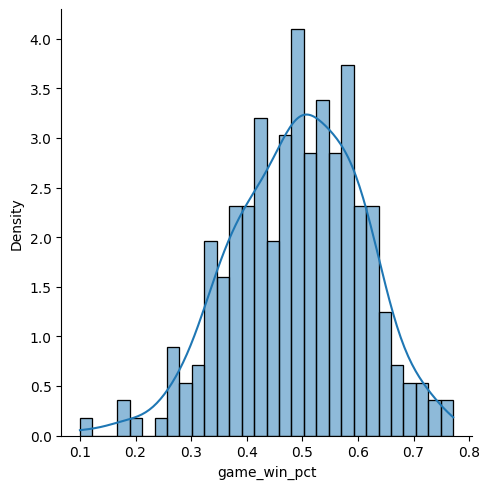

In [26]:
sns.displot(df["game_win_pct"], stat="density", bins=30, kde=True)

### grouped by handicap
win rate seems to increase linearly w/ handicap

In [27]:
by_handicap = df.drop(["team_id"], axis=1).groupby(by="handicap").sum(numeric_only=True)
by_handicap["game_win_pct"] = by_handicap["game_win_wpct"] / (by_handicap["game_wins"] + by_handicap["game_losses"])
by_handicap["match_win_pct"] = by_handicap["match_win_wpct"] / (by_handicap["match_wins"] + by_handicap["match_losses"])
by_handicap

,game_wins,game_losses,match_wins,match_losses,game_win_pct,match_win_pct,game_win_wpct,match_win_wpct
handicap,,,,,,,,
2,131,131,19,21,0.500000,0.475000,131.0,19.0
3,696,826,94,139,0.457293,0.403433,696.0,94.0
4,906,1004,122,147,0.474346,0.453532,906.0,122.0
5,1728,1652,236,202,0.511243,0.538813,1728.0,236.0
6,1479,1431,172,162,0.508247,0.514970,1479.0,172.0
7,944,902,101,91,0.511376,0.526042,944.0,101.0
8,384,314,47,24,0.550143,0.661972,384.0,47.0
9,84,92,6,11,0.477273,0.352941,84.0,6.0


### How many stdevs away from the handicap average a player is

i.e. how good a player is relative to their handicap. This is to prevent us weighting higher-handicapped players too much (since we expect them to do better).

In [28]:
game_win_pct_by_handicap = by_handicap.to_dict()["game_win_pct"]
df["game_win_pct_deviation_from_handicap_avg"] = (
    df["game_win_pct"]  
    - df["handicap"].apply(lambda x: game_win_pct_by_handicap[x])
)

game_win_pct_deviation_stdev_weighted = np.sqrt(
       (
           df["game_win_pct_deviation_from_handicap_avg"] ** 2 * (df["game_wins"] + df["game_losses"])
       ).sum()
    / (df["game_wins"] + df["game_losses"]).sum()
)

df["stdevs_from_handicap_avg"] = df["game_win_pct_deviation_from_handicap_avg"] / game_win_pct_deviation_stdev_weighted

df.nlargest(20, "stdevs_from_handicap_avg")

,team_id,name,handicap,game_wins,game_losses,match_wins,match_losses,game_win_pct,match_win_pct,game_win_wpct,match_win_wpct,game_win_pct_deviation_from_handicap_avg,stdevs_from_handicap_avg
195,32,Kristie Lim,3,19,7,4,0,0.730769,1.000000,19.0,4.0,0.273476,2.712962
137,22,Mark Ogawa,6,27,8,4,0,0.771429,1.000000,27.0,4.0,0.263181,2.610832
216,35,Amaury Lozano,3,31,13,6,1,0.704545,0.857143,31.0,6.0,0.247252,2.452815
51,9,Lise Ho,3,23,10,4,1,0.696970,0.800000,23.0,4.0,0.239677,2.377661
209,34,Kartikey Grover,7,12,4,2,0,0.750000,1.000000,12.0,2.0,0.238624,2.367219
144,23,Troy Holden,5,16,6,4,0,0.727273,1.000000,16.0,4.0,0.216030,2.143081
58,10,Michael Atkins,2,5,2,1,0,0.714286,1.000000,5.0,1.0,0.214286,2.125776
162,26,Piyush Jindal,6,35,14,6,0,0.714286,1.000000,35.0,6.0,0.206038,2.043959
163,26,Saurabh Baisane,4,30,15,5,1,0.666667,0.833333,30.0,5.0,0.192321,1.907881
208,34,Ramesh Torres,5,45,19,8,0,0.703125,1.000000,45.0,8.0,0.191882,1.903528


### top players

weight the number of stdevs from handicap avg by games played--a lot of people played only one match and won.

In [29]:
df["player_score"] = (
    df["stdevs_from_handicap_avg"]
    * np.sqrt(df["game_wins"] + df["game_losses"]))

df.nlargest(20, "player_score")

,team_id,name,handicap,game_wins,game_losses,match_wins,match_losses,game_win_pct,match_win_pct,game_win_wpct,match_win_wpct,game_win_pct_deviation_from_handicap_avg,stdevs_from_handicap_avg,player_score
216,35,Amaury Lozano,3,31,13,6,1,0.704545,0.857143,31.0,6.0,0.247252,2.452815,16.270132
137,22,Mark Ogawa,6,27,8,4,0,0.771429,1.000000,27.0,4.0,0.263181,2.610832,15.445892
208,34,Ramesh Torres,5,45,19,8,0,0.703125,1.000000,45.0,8.0,0.191882,1.903528,15.228226
162,26,Piyush Jindal,6,35,14,6,0,0.714286,1.000000,35.0,6.0,0.206038,2.043959,14.307712
195,32,Kristie Lim,3,19,7,4,0,0.730769,1.000000,19.0,4.0,0.273476,2.712962,13.833447
51,9,Lise Ho,3,23,10,4,1,0.696970,0.800000,23.0,4.0,0.239677,2.377661,13.658623
163,26,Saurabh Baisane,4,30,15,5,1,0.666667,0.833333,30.0,5.0,0.192321,1.907881,12.798452
76,13,Jane Nechayevsky,2,30,14,5,2,0.681818,0.714286,30.0,5.0,0.181818,1.803688,11.964315
15,3,Elena Walker,4,35,20,6,2,0.636364,0.750000,35.0,6.0,0.162018,1.607266,11.919802
119,19,Mary Lenz,3,28,16,5,2,0.636364,0.714286,28.0,5.0,0.179071,1.776432,11.783514


### grouped by team, "best" teams first

In [30]:
by_team = df.drop(["handicap", "player_score"], axis=1).groupby(by="team_id").sum(numeric_only=True)
by_team = by_team[["game_wins", "game_losses", "game_win_wpct"]]
by_team["team_score"] = by_team["game_win_wpct"] / np.sqrt(by_team["game_wins"] + by_team["game_losses"])
by_team.sort_values("team_score", ascending=False)

,game_wins,game_losses,game_win_wpct,team_score
team_id,,,,
4,212,134,212.0,11.397191
22,200,163,200.0,10.497278
19,187,133,187.0,10.453618
31,183,140,183.0,10.182392
34,180,136,180.0,10.125791
7,187,166,187.0,9.953006
3,169,122,169.0,9.906955
40,177,143,177.0,9.894601
23,172,132,172.0,9.864877


## Team we are playing this week

In [31]:
df[df["team_id"] == 25]

,team_id,name,handicap,game_wins,game_losses,match_wins,match_losses,game_win_pct,match_win_pct,game_win_wpct,match_win_wpct,game_win_pct_deviation_from_handicap_avg,stdevs_from_handicap_avg,player_score
155,25,Miles Gordon,5,9,15,1,2,0.375000,0.333333,9.0,1.0,-0.136243,-1.351566,-6.621292
156,25,Eric Biddulphwest,5,36,22,6,1,0.620690,0.857143,36.0,6.0,0.109447,1.085746,8.268796
157,25,Nick Sanfardino,6,44,27,7,2,0.619718,0.777778,44.0,7.0,0.111471,1.105823,9.317831
158,25,John Kerbawy,8,39,29,5,2,0.573529,0.714286,39.0,5.0,0.023386,0.231997,1.913098
159,25,Mike Manney,5,16,20,1,4,0.444444,0.200000,16.0,1.0,-0.066798,-0.662657,-3.975941
160,25,Armando Ramos,7,38,52,3,6,0.422222,0.333333,38.0,3.0,-0.089154,-0.884430,-8.390444
